## Vaka Analizi: Zaman Serisi ve Basit Doğrusal Regresyon (Case Study: Time Series and Simple Linear Regression)
* Basit doğrusal regresyon, en basit regresyon algoritmasıdır.
* Bağımsız bir değişkeni ve bir bağımlı değişkeni temsil eden bir sayısal değerler koleksiyonu verildiğinde, basit doğrusal regresyon, bu değişkenler arasındaki ilişkiyi, regresyon çizgisi olarak bilinen düz bir çizgiyle açıklar.
* 1895'ten 2018'e kadar olan ortalama New York Ocak yüksek sıcaklık verilerinin bir zaman serisini kullanarak,
    * Basit doğrusal regresyon gerçekleştirin
    * Regresyon çizgisiyle bir dağılım grafiği görüntüleme
    * Tahmin yapmak için tahminci tarafından hesaplanan katsayı ve kesme değerlerini kullanın
* **ave_hi_nyc_jan_1895-2018.csv** dosyasında saklanan sıcaklık verileri

## Ortalama Yüksek Sıcaklıkları DataFrame'e Yükleme
* ave_hi_nyc_jan_1895-2018.csv dosyasındaki verileri yükleyin, 'Değer' sütununu 'Sıcaklık' olarak yeniden adlandırın, her tarih değerinin sonundaki 01'i kaldırın ve birkaç veri örneği görüntüleyin:
* **Matplotlib'i bu not defterinde etkinleştirmek için satır içi matplotlib ekledik.**

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ave_hi_nyc_jan_1895-2018.csv'

In [3]:
nyc.head(3)

NameError: name 'nyc' is not defined

In [4]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

NameError: name 'nyc' is not defined

In [5]:
nyc.Date = nyc.Date.floordiv(100)

NameError: name 'nyc' is not defined

In [6]:
nyc.head(3)

NameError: name 'nyc' is not defined

### Verileri Eğitim ve Test için Bölme
* Sklearn.linear_model'den LinearRegression tahmin edicisini kullanacağız.
* Varsayılan olarak, bu tahmin edici, çoklu doğrusal regresyon gerçekleştirmek için bir veri kümesindeki tüm sayısal özellikleri kullanır.
* Basit doğrusal regresyon için bağımsız değişken olarak bir özellik (burada Date) seçin.
    * DataFrame'deki bir sütun, tek boyutlu bir seridir.
    * Scikit-learn tahmincileri, eğitim ve test verilerinin iki boyutlu olmasını gerektirir.
    * n elemanlı Seriyi, n satır ve bir sütun içeren iki boyuta dönüştüreceğiz.

* nyc.Date.values, Date sütununun değerlerini içeren NumPy dizisini döndürür.
* reshape(-1, 1), reshape'e dizideki sütun sayısına (1) ve öğe sayısına (124) bağlı olarak satır sayısını çıkarmasını söyler.
    * Dönüştürülen dizi 124 satır ve bir sütuna sahip olacak.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

NameError: name 'nyc' is not defined

* %75–%25 train testi onaylama

In [9]:
X_train.shape

NameError: name 'X_train' is not defined

In [10]:
X_test.shape

NameError: name 'X_test' is not defined

### Modeli Eğitmek

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_regression = LinearRegression()

In [13]:
linear_regression.fit(X=X_train, y=y_train)

NameError: name 'X_train' is not defined

* Veriler için en uygun regresyon çizgisini bulmak için LinearRegression tahmincisi, veri noktalarının hattan uzaklıklarının karelerinin toplamını en aza indirmek için eğimi ve kesişimi yinelemeli olarak ayarlar.
* Yakında tahminler yapmak için eğim ve kesişme noktalarını kullanacağız.
\begin{equation}
y = m x + b
\end{equation}
* Eğim, tahmin edicinin katsayı özelliğidir (denklemde m)
* Kesişme, tahmin edicinin kesişme_ özelliğidir (denklemde b)

In [14]:
linear_regression.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [15]:
linear_regression.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

### Modeli Test Etme
* X_test'teki verileri kullanarak modeli test edin ve bazı tahminleri kontrol edin.

In [16]:
predicted = linear_regression.predict(X_test)

NameError: name 'X_test' is not defined

In [17]:
expected = y_test

NameError: name 'y_test' is not defined

In [18]:
for p, e in zip(predicted[::5], expected[::5]):  # check every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

NameError: name 'predicted' is not defined

### Gelecekteki Sıcaklıkları Tahmin Etme ve Geçmiş Sıcaklıkları Tahmin Etme

In [19]:
# lambda y = mx + b uygular.
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

In [20]:
predict(2019)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [21]:
predict(1890)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### Veri Kümesini Regresyon Doğrusu ile Görselleştirme
* Regresyon çizgisiyle dağılım grafiği oluşturma
* Daha koyu renklerde gösterilen daha düşük sıcaklıklar
* Eğitmen Notu: Grafiği değiştiren tüm kodlar aynı not defteri hücresinde olmalıdır.

In [22]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)  

axes.set_ylim(10, 70)  # scale y-axis 

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

NameError: name 'nyc' is not defined

## Overfitting/Underfitting
* Doğru tahminleri engelleyen yaygın sorunlar
* Bir model oluştururken ana hedef, henüz görmediği veriler için doğru tahminler yapmaktır.
* Underfitting, bir modelin eğitim verilerine dayanarak tahmin yapmak için çok basit olması durumunda ortaya çıkar.
    * Problem gerçekten doğrusal olmayan bir model gerektirdiğinde, basit doğrusal regresyon gibi bir doğrusal model kullanabilirsiniz.
* Overfitting, modeliniz çok karmaşık olduğunda gerçekleşir.
    * En aşırı durum, eğitim verilerini ezberleyen bir model olacaktır.
    * Eğitim verileriyle eşleşen yeni veriler, mükemmel tahminler üretecek ancak model, daha önce hiç görmediği verilerle ne yapacağını bilemeyecektir.

## Vaka Analizi: California Konut Veri Kümesi ile Çoklu Doğrusal Regresyon (Case Study: Multiple Linear Regression with the California Housing Dataset)
* [**California Housing dataset**](http://lib.stat.cmu.edu/datasets) scikit-learn ile birlikte gelir.
* Her biri sekiz sayısal özelliğe sahip daha büyük gerçek dünya veri kümesi 20.640 örnek
    * Pace, R. Kelley ve Ronald Barry, Seyrek Mekansal Otoregresyonlar, İstatistikler ve Olasılık Mektupları, 33 (1997) 291-297. Kelley Pace (kpace@unix1.sncc.lsu.edu) tarafından StatLib Veri Kümeleri Arşivine gönderildi. [9/Kasım/99]
* Sekiz sayısal özelliğin tümünü kullanarak çoklu doğrusal regresyon gerçekleştirin.
    * Yalnızca tek bir özelliği veya özelliklerin bir alt kümesini kullanmaktan daha karmaşık konut fiyatı tahminleri yapın.
* LinearRegression tahmin aracı, varsayılan olarak çoklu doğrusal regresyon gerçekleştirir.

### Veri Kümesini Yükleme (Loading the Dataset)
* California Konut Fiyatları veri kümesinin scikit-learn'deki açıklamasına göre
> "Bu veri kümesi, nüfus sayımı blok grubu başına bir satır kullanılarak 1990 ABD nüfus sayımından türetilmiştir."
>
> "Bir blok grubu, ABD Sayım Bürosunun örnek verileri yayınladığı en küçük coğrafi birimdir (tipik olarak 600 ila 3.000 kişilik bir nüfusa sahiptir)."

* Veri kümesi, her biri sekiz özellik içeren 20.640 örneğe (blok grubu başına bir tane) sahiptir:
    * median income: on binlerce, yani 83.700 doları temsil eder.
    * median house age: veri setinde bu özellik için maksimum değer 52'dir.
    * average number of rooms: ortalama oda sayısı
    * average number of bedrooms: ortalama yatak odası sayısı
    * block population: blok nüfusu
    * average house occupancy: ortalama ev doluluk
    * house block latitude: ev bloğu enlemi
    * house block longitude: ev bloğu boylamı

* Hedef: yüz binlerce medyan ev değeri, yani 355.000 doları temsil eder.
    * Bu özelliğin maksimum değeri 500.000 ABD dolarıdır.
* Daha fazla yatak odası, daha fazla oda veya daha yüksek gelir beklemek makul, daha yüksek ev değeri anlamına gelir.
* Tahmin yapmak için tüm sayısal özellikleri birleştirin.
    * Basit doğrusal regresyondan daha doğru tahminler elde etme olasılığı daha yüksektir.

## Verileri Yükleme (Loading the Data)
* sklearn.datasets işlevini fetch_california_housing kullanın.
* Matplotlib'i bu not defterinde etkinleştirmek için satır içi matplotlib ekledik.

In [23]:
%matplotlib inline
from sklearn.datasets import fetch_california_housing

In [24]:
california = fetch_california_housing()  # Grup nesnesi

In [25]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Veri Kümesinin Açıklamasını Görüntüleme 

In [26]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* Örnek/özellik sayısını, hedef sayısını, özellik adlarını onaylayın.

In [27]:
california.data.shape

(20640, 8)

In [28]:
california.target.shape

(20640,)

In [29]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Exploring the Data with a Pandas

In [30]:
import pandas as pd

In [31]:
pd.set_option('precision', 4)  # 4 haneli hassasiyet

OptionError: 'Pattern matched multiple keys'

* IPython etkileşimli modunda komut satırı çıktıları için kullanılır.
* pd.set_option('max_columns', 9)
    * DataFrame çıktılarında 9 sütuna kadar görüntüleme
* pd.set_option('display.width', Yok)
    * kaydırma için ekran genişliğini otomatik olarak algıla

* İkinci ifade, medyan ev değerleri için bir DataFrame sütunu ekler.

In [32]:
california_df = pd.DataFrame(california.data, 
                             columns=california.feature_names)

In [33]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [34]:
california_df.head()  # ilk 5 satıra bakılsın

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploring the Data with a Pandas DataFrame
* DataFrame'in özet istatistiklerini hesaplayın.
* Medyan gelir ve ev değerleri 1990 yılına aittir ve bugün önemli ölçüde daha yüksektir.

In [35]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Özellikleri Görselleştirme
* Her özelliğe karşı hedef değeri çizerek verileri görselleştirmeye yardımcı olur Medyan ev değerinin her özellikle nasıl ilişkili olduğunu gösterir.
* Görselleştirmelerimizi daha net hale getirmek için, grafik oluşturmak için 20.640 örneğin %10'unu rastgele seçmek üzere DataFrame yöntemi örneğini kullanalım.

In [36]:
sample_df = california_df.sample(frac=0.1, random_state=17)

* Çeşitli özelliklerin dağılım grafiklerini görüntüleyin.
* Her biri özelliği x ekseninde ve medyan ana değeri y ekseninde gösterir.

In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

In [ ]:
# sns.set(font_scale=2)

In [39]:
sns.set_style('whitegrid')     

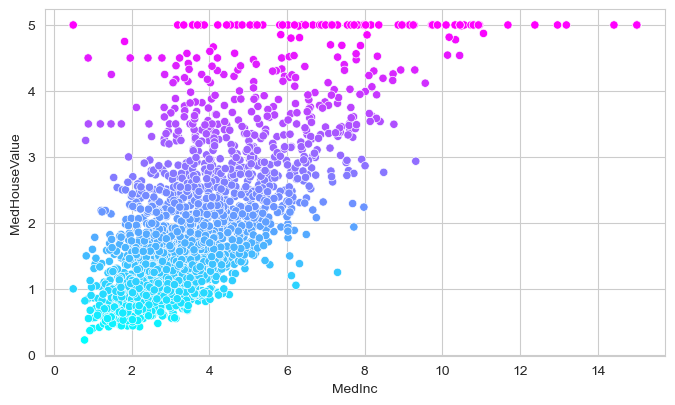

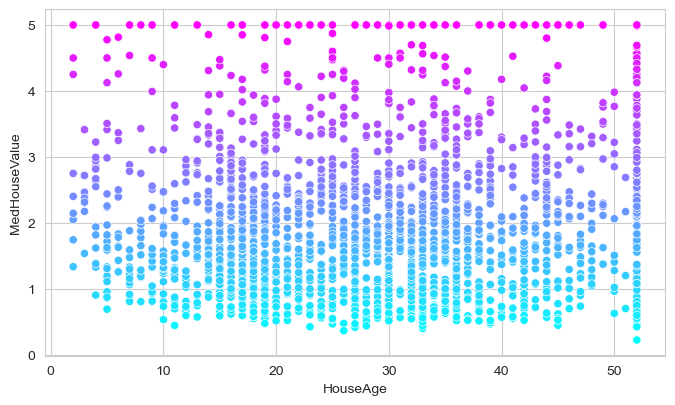

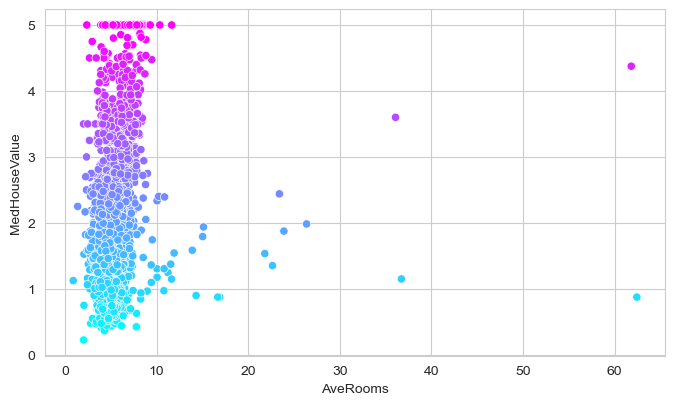

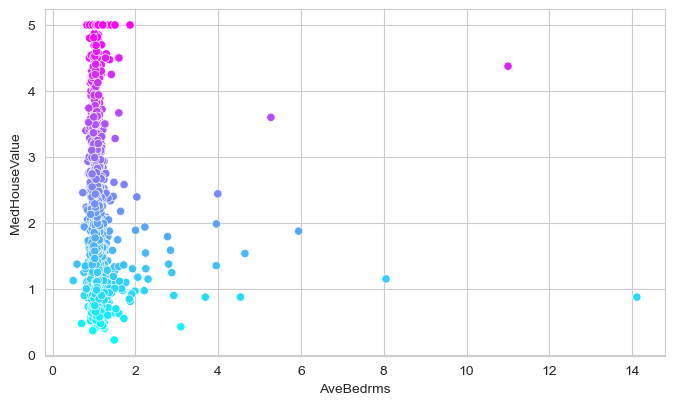

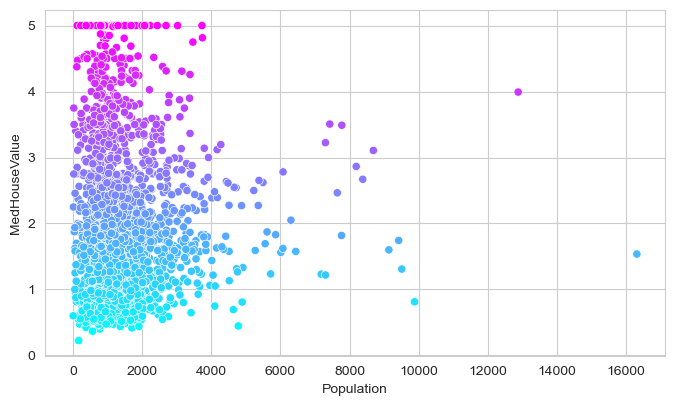

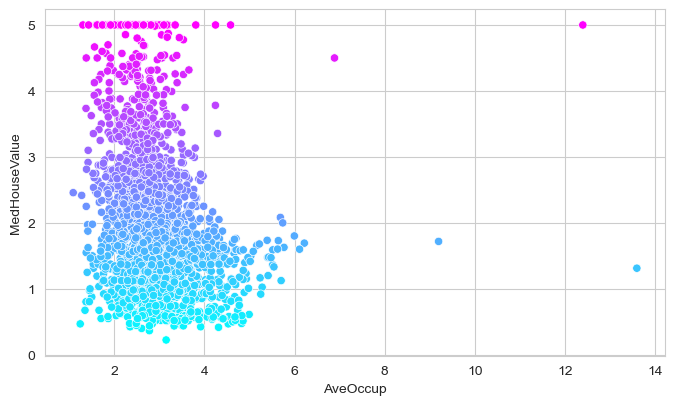

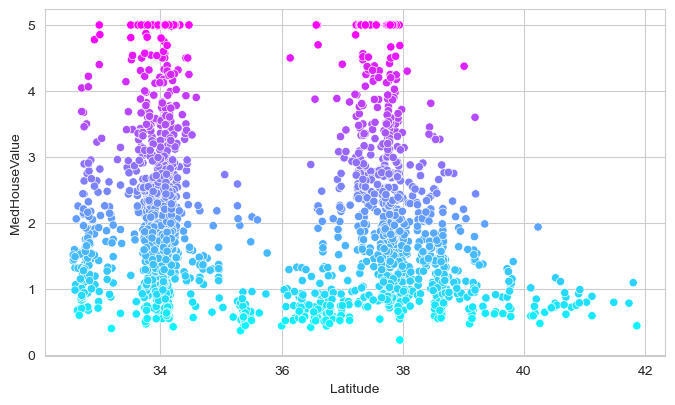

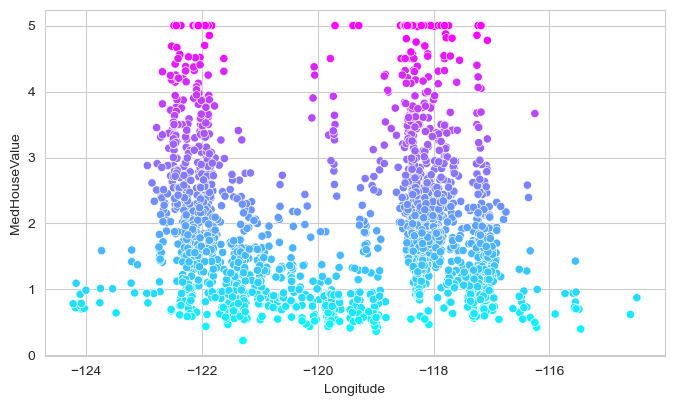

In [40]:
for feature in california.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y='MedHouseValue', hue='MedHouseValue', 
                    palette='cool', legend=False)

* Bu grafiklerde dikkat edilmesi gereken bazı ilginç şeyler:
    * Enlem ve boylam grafiklerinin her biri, özellikle önemli yoğunluğa sahip iki alana sahiptir: ev fiyatlarının daha yüksek olma eğiliminde olduğu daha büyük Los Angeles ve daha büyük San Francisco bölgeleri
    * Her grafik, 1990 nüfus sayımı formunda listelenen 500.000 ABD doları değerindeki maksimum medyan ev değerini temsil eden y ekseni değerinde 5 yatay bir nokta çizgisini gösterir.
    * HouseAge grafiği, x ekseni değeri 52'de dikey bir nokta çizgisini gösterir
        * 1990 nüfus sayımı formundaki en yüksek ev yaşı 52 idi.

### Train_test_split Kullanarak Eğitim ve Test İçin Verileri Bölme

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=11)

In [43]:
X_train.shape

(15480, 8)

In [44]:
X_test.shape

(5160, 8)

### Modeli Eğitmek
* LinearRegression, bir veri kümesinin veri dizisindeki tüm özellikleri kullanmaya çalışır.
    * herhangi bir özellik kategorik ise hata
    * Kategorik veriler, sayısal verilere dönüştürülmeli veya hariç tutulmalıdır.
* Scikit-learn'in paketlenmiş veri kümeleri, eğitim için zaten doğru formatta

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_regression = LinearRegression()

In [47]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

* Her bir özellik için ayrı katsayılar (stored in coeff_'da saklanır) ve bir kesişim (stored in intercept_'de saklanır)
    * Pozitif katsayılar — özellik değeri arttıkça medyan ev değeri de artar.
    * Negatif katsayılar — özellik değeri arttıkça medyan ev değeri azalır.
    * HouseAge, AveOccup ve Population sıfıra yakın, dolayısıyla bunların medyan ev değeri üzerinde çok az etkisi var veya hiç yok gibi görünüyor.

In [48]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')  

    MedInc: 0.4377030215382211
  HouseAge: 0.009216834565797898
  AveRooms: -0.10732526637360985
 AveBedrms: 0.6117133073918087
Population: -5.756822009313492e-06
  AveOccup: -0.003384566465716392
  Latitude: -0.4194818609649063
 Longitude: -0.4337713349874021


In [49]:
linear_regression.intercept_

-36.88295065605555

### Modu Eğitmek
* Tahmin yapmak için aşağıdaki denklemdeki katsayı değerlerini kullanabilir:
\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}
* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> özellik katsayılarıdır.
* <em>b</em> kesişme noktasıdır.
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> özellik değerleridir. (bağımsız değişkenler)
* <em>y</em> y tahmin edilen değerdir. (bağımlı değişken)

### Modeli Test Etme
* Tahmin edicinin predict yöntemini kullanın.

In [50]:
predicted = linear_regression.predict(X_test)

In [51]:
expected = y_test

In [52]:
predicted[:5]  # ilk 5 tahmin

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [53]:
expected[:5]   # ilk beş hedef

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Tahmin Edicinin tahmin Yöntemi ile Modeli Test Etme
* Sınıflandırmada tahminler, veri kümesindeki mevcut sınıflarla eşleşen farklı sınıflardı.
* Regresyonda, sürekli çıktılarınız olduğu için kesin tahminler elde etmek zordur.
    * Aşağıdaki hesaplamada <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub>'nin olası her değeri bir değer öngörür.
    
\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

### Beklenen ve Öngörülen Fiyatların Görselleştirilmesi
* Beklenen ve tahmin edilen değerler için sütunlar içeren bir DataFrame oluşturun:

In [54]:
df = pd.DataFrame()

In [55]:
df['Expected'] = pd.Series(expected)

In [56]:
df['Predicted'] = pd.Series(predicted)

* Verileri, x ekseni boyunca beklenen (hedef) fiyatları ve y ekseni boyunca tahmin edilen fiyatları içeren bir dağılım grafiği olarak çizin:

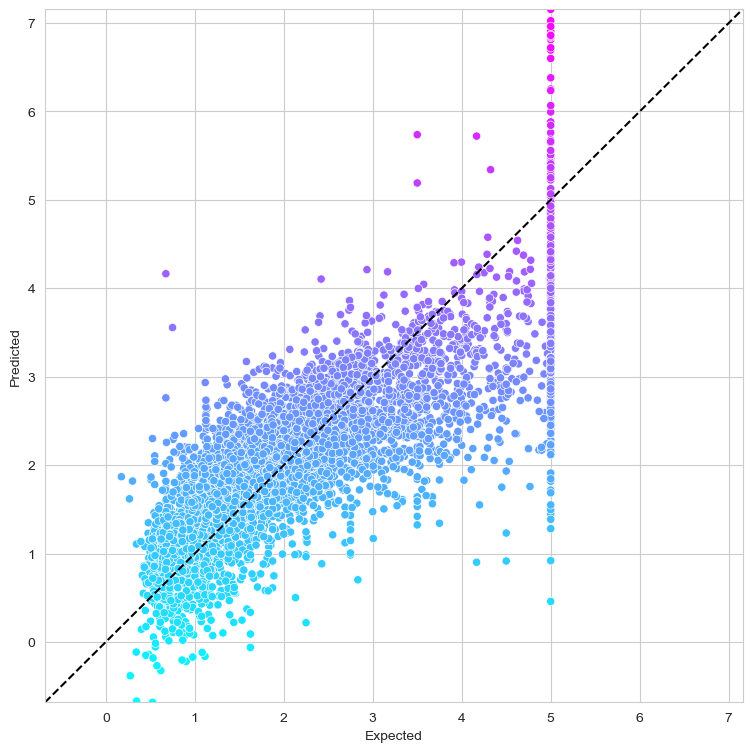

In [57]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

* Her iki eksen boyunca aynı ölçeği kullanmak için x ve y eksenlerinin sınırlarını ayarlayın:
* Mükemmel tahminleri temsil eden bir çizgi çizin. (bu bir gerileme çizgisi değildir)
    * Çizdirme çağrısı, grafiğin sol alt köşesini (başlangıç, başlangıç) ve grafiğin sağ üst köşesini (bitiş, bitiş) temsil eden noktalar arasında bir çizgi görüntüler.
    * Üçüncü bağımsız değişken ('k--') satırın stilini belirtir.
    * k harfi siyah rengi temsil eder ve, çizimin kesikli bir çizgi çizmesi gerektiğini belirtir:
* Tahmin edilen her değer beklenen değerle eşleşirse, tüm noktalar kesikli çizgi boyunca çizilir.
* Beklenen medyan ev değeri arttıkça, tahmin edilen değerlerin çoğunun çizginin altına düştüğü görülmektedir.
* Dolayısıyla model, beklenen medyan ev değeri arttıkça daha düşük medyan ev değerlerini tahmin ediyor gibi görünmektedir.

### Regresyon Modeli Metrikleri
* Regresyon tahmincileri için metrikler belirleme katsayısını içerir. (**$R^{2}$ score**; 0.0-1.0)
    * 1.0 — tahmin edici, bağımsız değişkenlerin değerleri verildiğinde bağımlı değişkenin değerini mükemmel bir şekilde tahmin eder.
    * 0.0 — model, bağımsız değişkenlerin değerleri göz önüne alındığında herhangi bir doğrulukla tahmin yapamaz.
* Beklenen ve tahmin edilen sonuçları temsil eden dizilerle hesaplayın.

In [58]:
from sklearn import metrics

In [59]:
metrics.r2_score(expected, predicted)

0.6008983115964326

### En İyi Modeli Seçmek
* Herhangi birinin LinearRegression'dan daha iyi sonuçlar üretip üretmediğini belirlemek için birkaç tahmin edici deneyin.
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [60]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [61]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

* Tahmin edicileri k-katlı çapraz doğrulama kullanarak çalıştırın.
* **`cross_val_score` bağımsız değişken puanlaması `'r2'`** &mdash; her kat  $R^{2}$ için puan bildir. 
    * 1.0 en iyisidir, bu nedenle LinearRegression ve Ridge bu veri kümesi için en iyi modeller gibi görünmektedir.

In [62]:
from sklearn.model_selection import KFold, cross_val_score

In [63]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=california.data, y=california.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


## Örnek Olay (Case Study): Denetimsiz Makine Öğrenimi, 1. Bölüm—Boyut Azaltma (Unsupervised Machine Learning, Part 1—Dimensionality Reduction)
* Verilerinizi tanımaya odaklandık.
* Denetimsiz makine öğrenimi ve görselleştirme, etiketlenmemiş örnekler arasındaki kalıpları ve ilişkileri bulmanıza yardımcı olabilir.
* Verileri iki değişkenle görselleştirmek kolaydır.
    * Her eksen boyunca bir değişkenle verileri 2D olarak çizin.
    * Görselleştirme kitaplıkları ayrıca üç değişkenli veri kümelerini 3D olarak çizebilir.
* Ancak verileri üçten fazla boyutla nasıl görselleştirirsiniz?
    * Digits veri kümesi örneklerinin her biri 64 özelliğe (boyut) ve bir hedef değere sahiptir.
    * Big Data (Büyük Veri) örnekleri yüzlerce, binlerce hatta milyonlarca özelliğe (boyutlara) sahip olabilir.
* Görselleştirmek için, verileri iki veya üç boyuta indirgemek gerekir.
* Boyut azaltma adı verilen denetimsiz bir makine öğrenimi tekniği kullanın.
* Sonuçların görselleştirilmesi, kullanılacak en uygun makine öğrenimi algoritmalarını seçmenize yardımcı olacak verilerdeki kalıpları ortaya çıkarabilir.
* Örneğin, nokta kümeleri, veri kümesi içindeki farklı bilgi sınıflarını gösterebilir.
    * Bu nedenle, bir sınıflandırma algoritması uygun olabilir.
    * Yine de her kümedeki örneklerin sınıfını belirlemeniz gerekir.
    * Ortak yönlerini görmek için bir alan uzmanına danışmayı ve bir kümedeki örnekleri incelemeyi gerektirebilir.
* Boyut azaltma, başka amaçlara da hizmet eder.
    * Tahmincilerin önemli sayıda boyuta sahip büyük verilerle ilgili eğitimi saatler, günler, haftalar veya daha uzun sürebilir.
    * İnsanların çok boyutlu verileri düşünmesi zordur.
    * Eğitim performansını iyileştirmek için yakından ilişkili özellikleri ortadan kaldırabilir veya birleştirebilir.
        * Modelin doğruluğunu azaltabilir.

### Digits Veri Kümesini Yükleme
* Digits veri kümesi etiketlerini göz ardı edin ve verileri iki boyutlu olarak görselleştirmeye yardımcı olması için boyutluluk azaltmayı kullanın.
* Bu not defterinde Matplotlib'i etkinleştirmek için %matplotlib satır içi ekledik.

In [64]:
%matplotlib inline
from sklearn.datasets import load_digits

In [65]:
digits = load_digits()

### Boyut Azaltma için TSNE Tahmincisi Oluşturma (Creating a TSNE Estimator for Dimensionality Reduction)
* TSNE tahmin aracı, bir veri kümesinin özelliklerini analiz etmek ve bunları belirtilen sayıda boyuta indirgemek için t-dağıtılmış Stokastik Komşu Gömme (t-SNE) adlı bir algoritma kullanır.
    * [Algorithm’s details](https://scikit-learn.org/stable/modules/manifold.html#t-sne) kapsamın dışında.
    * Önce popüler PCA (temel bileşenler analizi) tahmin edicisini denedik ancak sonuçları beğenmedik, bu yüzden TSNE'ye geçtik.
* Bir veri kümesinin özelliklerini iki boyuta indirgeyen bir TSNE nesnesi oluşturun.
* Rakam kümelerini görüntülediğimizde “oluşturma dizisinin” tekrar üretilebilirliği için random_state kullanılır.

In [66]:
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, random_state=11)

### Digits Veri Kümesinin Özelliklerini İki Boyuta Dönüştürmek (Transforming the Digits Dataset’s Features into Two Dimensions)
* Uyarı notu: Yaklaşık 15-20 saniye sürer, bu nedenle önce kodu çalıştırın.
* İki adım:
    * Tahmin ediciyi veri kümesiyle eğitin.
    * Verileri belirtilen sayıda boyuta dönüştürmek için tahmin ediciyi kullanın.
* TSNE metotları ile ayrı ayrı performans gösterebilir ve dönüştürebilir.
* fit_transform kullanarak tek bir ifadede gerçekleştirin.
    * digits.data ile aynı sayıda satıra ve iki sütuna sahip diziyi döndürür.

In [68]:
reduced_data = tsne.fit_transform(digits.data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [69]:
reduced_data.shape

(1797, 2)

### İndirgenmiş Verileri Görselleştirme
* Seaborn'un dağılım grafiği işlevi yerine Matplotlib'in dağılım işlevini kullanın.
    * İkinci bir dağılım grafiğinde kullanacağımız çizilen öğelerin koleksiyonunu döndürür.

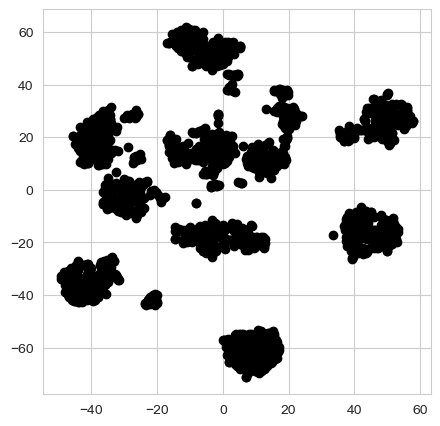

In [70]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5, 5))
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='black')

* Eksenleri etiketlemedi — orijinal veri kümesinin belirli özelliklerine karşılık gelmiyorlar.
* TSNE tarafından üretilen yeni özellikler, veri setinin orijinal özelliklerinden oldukça farklı olabilir.
* İlgili veri noktalarının kümelerini temizle.
* 10 yerine 11 ana küme gibi görünüyor.
* Bazı "serbest" veri noktaları
    * Mantıklı çünkü gördüğünüz gibi bazı rakamları sınıflandırmak zordu.

### İndirgenmiş Veriyi Her Basamak İçin Farklı Renklerle Görselleştirme
* Her kümedeki tüm ögelerin aynı basamağı temsil edip etmediğini bilmiyoruz.
    * Eğer değilse, kümeler yardımcı olmaz.
* Kümelerin gerçekten belirli basamakları temsil edip etmediğini görmek için noktaları renklendirmek üzere Digits veri kümesindeki hedefleri kullanın.
* c=digits.target — nokta renklerini belirlemek için hedef değerleri kullanın.
* cmap=plt.cm.get_cmap('nipy_spectral_r', 10) — kullanılacak renkli haritadır.
    * 10 basamak için özellikle 10 farklı renk kullanın.
* Son ifade, renk çubuğu anahtarı ekler.

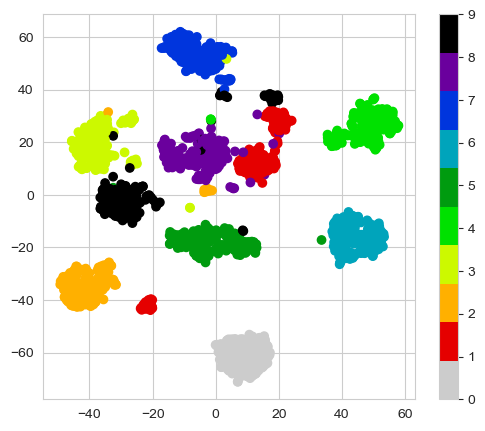

In [71]:
figure = plt.figure(figsize=(6, 5))

dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
 
colorbar = plt.colorbar(dots)  

## Örnek Olay (Case Study): Denetimsiz Makine Öğrenimi, Bölüm 2—k-Kümelemeyi Anlamlandırır (Unsupervised Machine Learning, Part 2—k-Means Clustering)
* En basit denetimsiz makine öğrenimi algoritmasıdır.
* Etiketlenmemiş örnekleri analiz edin ve bunları kümelere yerleştirmeye çalışın.
* k hiperparametresi, verilere empoze edilecek küme sayısını temsil eder.
* Kümeleri, k-NN sınıflandırmasına benzer mesafe hesaplamaları kullanarak organize eder.
* Her küme bir ağırlık merkezi (kümenin merkez noktası) etrafında gruplanmıştır.
* Başlangıçta, algoritma, veri kümesinin örneklerinden rastgele k merkezi seçer.
* Kalan örnekler ağırlık merkezi en yakın olan kümeye yerleştirilir.
* Merkezler yinelemeli olarak yeniden hesaplanır ve tüm kümeler için belirli bir merkezden kümedeki örneklere olan mesafeler en aza indirilene kadar örnekler kümelere yeniden atanır. Sonuçlar:
    * her numunenin ait olduğu kümeyi gösteren tek boyutlu etiket dizisidir.
    * kümelerin merkezlerinin iki boyutlu dizisidir. 

### İris Veri Kümesi (Iris Dataset)
* Iris veri kümesi — genellikle sınıflandırma ve kümeleme ile analiz edilir.
    * Fisher, R.A., "The use of multiple measurements in taxonomic problems", Annual Eugenics, 7, Kısım II, 179-188 (1936); ayrıca “Contributions to Mathematical Statistics”da (John Wiley, NY, 1950)
* Veri kümesi etiketlendi — kümelemeyi göstermek için etiketleri yok sayacağız.
    * Etiketleri daha sonra, k-means algoritmasının kümelenmiş örnekleri ne kadar iyi olduğunu belirlemek için kullanın.
* "Toy dataset (oyuncak veri kümesi)" — yalnızca 150 örneğe ve dört özelliğe sahiptir.
    * Üç Iris çiçeği türünün her biri için 50 örnek (dengeli sınıflar):
        * Iris setosa, Iris versicolor ve Iris virginica
    * Özellikler: çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliği, tümü santimetre cinsinden ölçülür.
    * Çanak yapraklar, tomurcuklar açmadan önce daha küçük iç yaprakları koruyan her çiçeğin daha büyük dış kısımlarıdır.

**Iris setosa**: 
https://commons.wikimedia.org/wiki/File:Wild_iris_KEFJ_(9025144383).jpg. 

**Iris versicolor**:
https://commons.wikimedia.org/wiki/Iris_versicolor#/media/File:IrisVersicolor-FoxRoost-Newfoundland.jpg. 

**Iris virginica**:
https://commons.wikimedia.org/wiki/File:IMG_7911-Iris_virginica.jpg.

### Iris Veri Kümesini Yükleme (Loading the Iris Dataset)
* Örnekleri sırasıyla Iris setosa, Iris versicolor ve Iris virginica'yı temsil eden 0, 1 ve 2 tamsayılarıyla etiketleyerek sınıflandırır.

In [72]:
from sklearn.datasets import load_iris

In [73]:
iris = load_iris()

In [74]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Örnek, Özellik ve Hedef Sayılarını Kontrol Etme
* Dizi target_names , hedef dizinin sayısal etiketleri için adlar içerir.
* dtype='<U10' — öğeler en fazla 10 karakterden oluşan dizelerdir.
* feature_names, veri dizisindeki her sütun için adları içerir.

In [75]:
iris.data.shape

(150, 4)

In [76]:
iris.target.shape

(150,)

In [77]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [78]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Exploring the Iris Dataset: Descriptive Statistics with a Pandas

In [79]:
import pandas as pd

In [80]:
# pd.set_option('max_columns', 5) 
# yalnızca IPython etkileşimli modunda gereklidir.

In [81]:
# pd.set_option('display.width', None) 
# yalnızca IPython etkileşimli modunda gereklidir.

* Veri dizisinin içeriğini içeren bir DataFrame oluşturun.
* Sütun adları olarak feature_names kullanın.

In [82]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

* Her numunenin tür adını içeren bir sütun ekleyin.
* List comprehension, target_names dizisinde karşılık gelen tür adını aramak için hedef dizideki her değeri kullanır.

In [83]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

* Birkaç örneğe bakın.

In [84]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Sayısal sütunlarda tanımlayıcı istatistikleri hesaplayın.

In [85]:
pd.set_option('precision', 2)

OptionError: 'Pattern matched multiple keys'

In [86]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* 'Türler(species)' sütununda tanımlamanın çağrılması, üç benzersiz değer içerdiğini doğrular.

In [87]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

* Numunelerin ait olduğu üç sınıf olduğunu önceden biliyoruz.
    * Denetimsiz makine öğreniminde durum genellikle böyle değildir.

## Veri Kümesini Seaborn çift grafiğiyle görselleştirme (Visualizing the Dataset with a Seaborn pairplot)
* Verileriniz hakkında daha fazla bilgi edinmek için özelliklerin birbiriyle nasıl ilişkili olduğunu görselleştirin.
* Dört özellik — tek bir grafikte birini diğer üçüne karşı çizemez.
* Özellik çiftlerini birbirine karşı çizebilir.
* Seaborn işlevi pairplot(çift arsa), bir grafik sistemi oluşturur.

In [88]:
import seaborn as sns

In [89]:
# sns.set(font_scale=1.1)

In [90]:
sns.set_style('whitegrid')

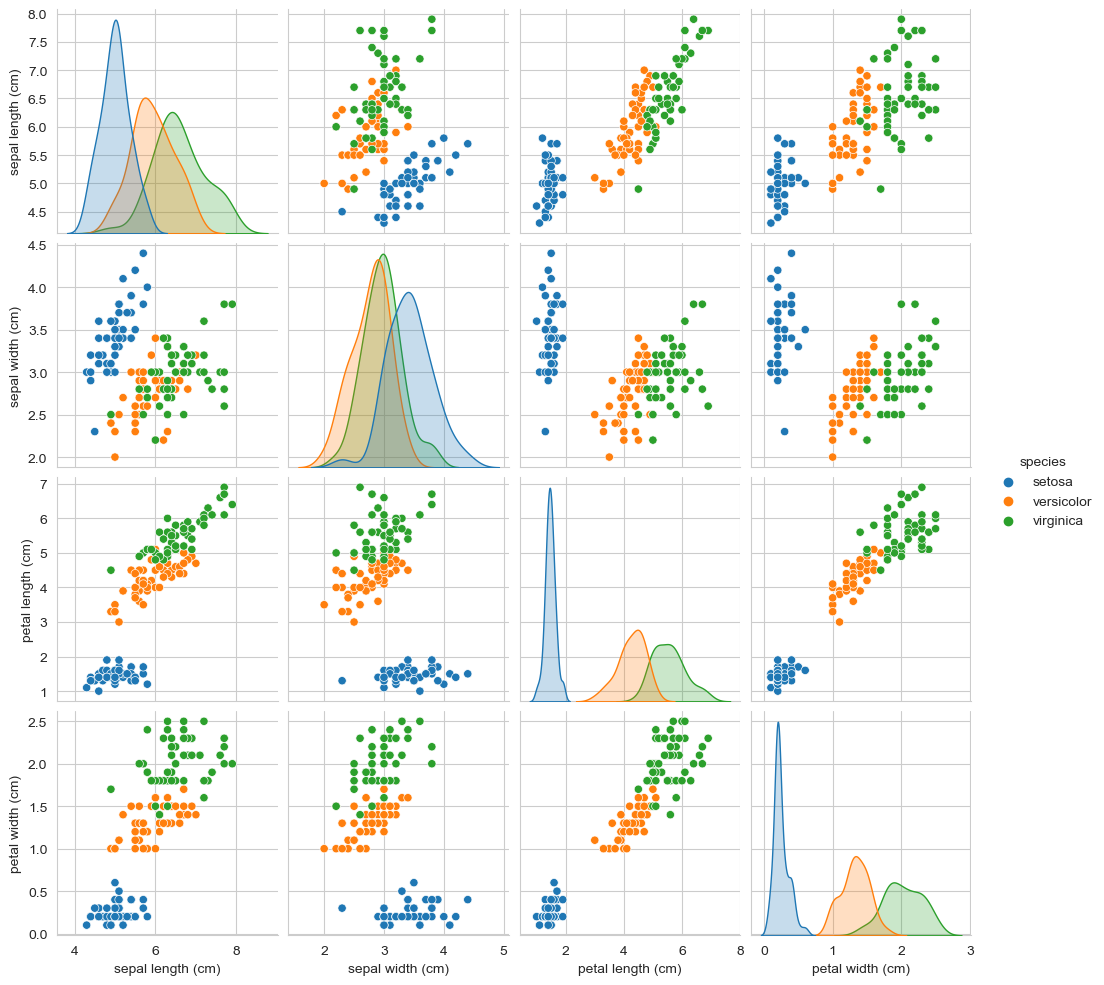

In [91]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

* Anahtar sözcük bağımsız değişkenleri şunlardır:
    * data—Çizilecek verileri içeren DataFrame (veya iki boyutlu dizi veya liste).
    * vars—Çizilecek değişkenlerin adlarını içeren bir sıra. Bir DataFrame için bunlar çizilecek sütunların adlarıdır.Burada sırasıyla çanak yaprağı uzunluğu, çanak yaprağı genişliğini, taç yaprağı uzunluğunu ve taç yaprağı genişliğini temsil eden ilk dört DataFrame sütununu kullanıyoruz.
    * hue—Çizilen verilerin renklerini belirlemek için kullanılan DataFrame sütunudur. Bu durumda, verileri Iris türüne göre renklendireceğiz.
* Sol üstten sağ alta köşegen boyunca uzanan grafikler, yalnızca o sütunda çizilen özelliğin değer aralığı (soldan sağa) ve bu değerlere sahip örnek sayısı (üst- tabanına).
* Bir sütundaki diğer grafikler, diğer özelliklerin x ekseni üzerindeki özelliğe göre dağılım grafiklerini gösterir.
* İlginç bir şekilde, tüm dağılım grafikleri, Iris setosa mavi noktalarını diğer türlerin turuncu ve yeşil noktalarından net bir şekilde ayırır ve bu da, Iris setosa'nın gerçekten de "kendi başına bir sınıfta" olduğunu gösterir.
* Diğer iki tür, üst üste binen turuncu ve yeşil noktalarla gösterildiği gibi bazen birbiriyle karıştırılabilir.
    * Elimizdeki çanak yaprak ölçülerine sahip olsaydık, bu iki türü birbirinden ayırmak zor olurdu.

### Çift grafiğin Tek Renk olarak görüntülenmesi (Displaying the pairplot in One Color)
* Hue anahtar kelime bağımsız değişkenini kaldırırsanız, pairplot, türleri nasıl ayırt edeceğini bilmediği için tüm verileri çizmek için yalnızca bir renk kullanır:

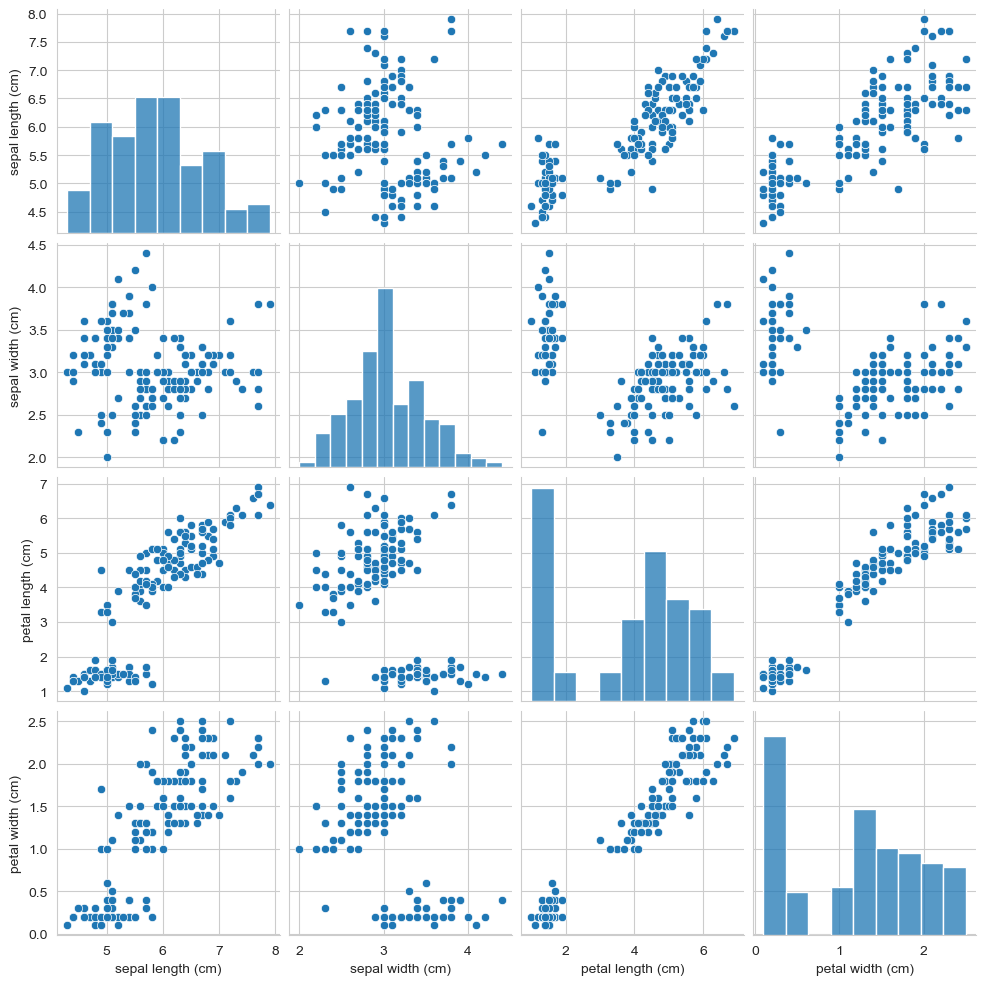

In [92]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

* Bu durumda, köşegen boyunca uzanan grafikler, türden bağımsız olarak o özellik için tüm değerlerin dağılımlarını gösteren histogramlardır.
* Bu veri kümesi için üç tür olduğunu bilmemize rağmen, yalnızca iki farklı küme olabileceği anlaşılıyor.
    * Küme sayısını önceden bilmiyorsanız, verilere tamamen aşina olan bir alan uzmanına sorabilirsiniz.
    * Böyle bir kişi, veri kümesinde üç tür olduğunu biliyor olabilir ve bu, veriler üzerinde makine öğrenimi gerçekleştirmeye çalışırken değerli bilgiler olacaktır.
* Çift grafik diyagramları, az sayıda özellik veya bir özellik alt kümesi için iyi çalışır, böylece az sayıda satır ve sütuna sahip olursunuz ve veri noktalarını görebilmeniz için nispeten az sayıda örneğe sahip olursunuz.
* Özelliklerin ve örneklerin sayısı arttıkça, her dağılım grafiği hızla okunamayacak kadar küçülür.

### Bir KMeans Tahmincisi Kullanmak (Using a KMeans Estimator)
* Iris veri kümesindeki her örneği bir kümeye yerleştirmek için KMeans tahmincisi aracılığıyla k-means kümelemesini kullanın.
#### KMeans Tahmincisi Oluşturma (Creating the KMeans Estimator)
* [`KMeans` default arguments](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Bir KMeans tahmin edicisi eğittiğinizde, her küme için kümenin merkez veri noktasını temsil eden bir ağırlık merkezi hesaplar.
    * Genellikle, uygun bir k (n_clusters) seçmenize yardımcı olması için alan uzmanlarına güvenirsiniz.
* Uygun k değerini tahmin etmek için hiperparametre ayarını da kullanabilir.

In [93]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(n_clusters=3, random_state=11)

### Modelin KMeans nesnesinin sığdırma Yöntemiyle Sığdırılması (Fitting the Model Via the KMeans object’s fit Method)
* Eğitim tamamlandığında, KMeans nesnesi şunları içerir:
    * 0 ile n_clusters - 1 arasında değerleri olan, örneklerin ait olduğu kümeleri gösteren etiketler_ dizisidir.
    * her satırın bir ağırlık merkezini temsil ettiği cluster_centers_ dizisidir.

In [95]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

### Küme Etiketlerini Iris Veri Kümesinin Hedef Değerleriyle Karşılaştırma
* İris veri kümesi etiketlenmiştir, böylece ne kadar iyi olduğunu anlamak için hedef dizi değerlerine bakabiliriz.
    * Etiketlenmemiş verilerde, tahmin edilen sınıfların mantıklı olup olmadığını değerlendirmeye yardımcı olması için bir alan uzmanına güveniriz.
* İlk 50 örnek Iris setosa, sonraki 50 örnek Iris versicolor, son 50 örnek Iris virginica
    * hedef dizi, bunları 0-2 değerleri ile temsil eder.
* KMeans kümeleri mükemmel bir şekilde seçtiyse, tahmin edicinin etiketler dizisindeki 50 öğelik her grubun ayrı bir etiketi olmalıdır.
    * KMeans etiketleri, veri kümesinin hedef dizisiyle ilişkili değildir.
* İlk 50 örnek bir küme olmalıdır.

In [96]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


* Sonraki 50 örnek ikinci bir küme olmalıdır. (ikisi değil)

In [97]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Son 50 örnek üçüncü bir küme olmalıdır. (14 değil)

In [98]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


* Sonuçlar, ikili grafik şemalarında gördüklerimizi doğruluyor.
    * Iris setosa “kendi başına bir sınıftadır.”
    * Iris versicolor ve Iris virginica arasında bir karışıklık vardır.

### Temel Bileşen Analizi ile Boyut Azaltma 
* 4 boyuttan 2 boyuta boyut indirgeme gerçekleştirmek için PCA tahmin aracını kullanın.
    * [Algorithm’s details](https://scikit-learn.org/stable/modules/decomposition.html#pca) kapsamın ötesinde

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2, random_state=11)

### Iris Veri Kümesinin Özelliklerini İki Boyuta Dönüştürmek

In [101]:
pca.fit(iris.data)  # trains estimator once

PCA(n_components=2, random_state=11)

In [102]:
iris_pca = pca.transform(iris.data)  # can be called many times to reduce data

* Çizdirmek üzere küme merkez noktalarını dört boyuttan ikiye indirmek için dönüşümü tekrar arayacağız.
* transform, iris.data ile aynı sayıda satıra ancak yalnızca iki sütuna sahip bir dizi döndürür.

In [103]:
iris_pca.shape

(150, 2)

### İndirgenmiş Verileri Görselleştirme
* İndirgenmiş verileri bir DataFrame'e yerleştirin ve nokta renklerini belirlemek için kullanacağımız bir tür sütunu ekleyin.

In [104]:
iris_pca_df = pd.DataFrame(iris_pca, 
                           columns=['Component1', 'Component2'])

In [105]:
iris_pca_df['species'] = iris_df.species

* Verileri Seaborn ile dağıtın.
* cluster_centers_ dizisindeki her bir centroid, veri kümesinin örnekleriyle aynı sayıda özelliğe (dört) sahiptir.
* Centroidleri çizmek için boyutlarını küçültmeliyiz.
* Bir merkezi, kümesindeki "ortalama" örnek olarak düşünün.
    * Bu nedenle, her centroid, diğer örneklerle aynı PCA tahmincisi kullanılarak dönüştürülmelidir.

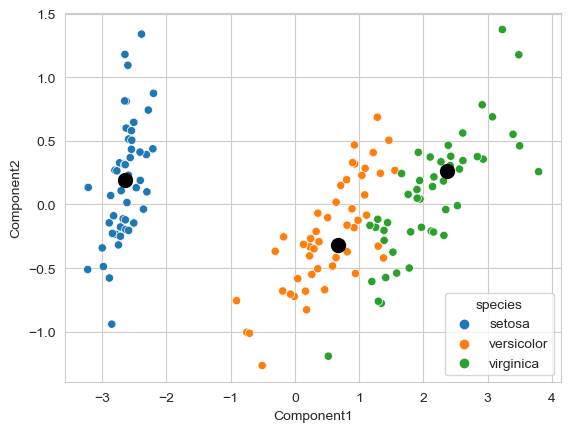

In [106]:
axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
    y='Component2', hue='species', legend='brief') 

# ağırlık merkezlerini 2 boyuta indirir
iris_centers = pca.transform(kmeans.cluster_centers_)

# ağırlık merkezlerini daha büyük siyah noktalar olarak çizer
import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s=100, c='k')

### En İyi Kümeleme Tahmincisi Seçimi (Choosing the Best Clustering Estimator)
* Birden fazla kümeleme algoritması çalıştırın ve Iris türlerini ne kadar iyi kümelediklerini görün.
    * KMeans'ı burada küçük Iris veri kümesinde çalıştırıyoruz.
    * Daha büyük veri kümelerinde KMeans ile ilgili performans sorunları yaşıyorsanız MiniBatchKMeans'ı göz önünde bulundurun.
    * Belgeler, MiniBatchKMeans'in büyük veri kümelerinde daha hızlı olduğunu ve sonuçların neredeyse aynı derecede iyi olduğunu gösteriyor.
* DBSCAN ve MeanShift tahmin edicileri için küme sayısını önceden belirtmiyoruz.

In [107]:
from sklearn.cluster import DBSCAN, MeanShift,\
    SpectralClustering, AgglomerativeClustering

In [108]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [109]:
import numpy as np

In [110]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0, 101, 50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts=True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')          


KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=0, count=50
50-100:
   label=1, count=50
100-150:
   label=1, count=15
   label=2, count=35

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35


* DBSCAN üç kümeyi doğru bir şekilde tahmin etti. (-1, 0 ve 1 olarak etiketlendi)
    * 100 Iris virginica ve Iris versicolor'dan 84'ü aynı kümeye yerleştirildi.
* MeanShift yalnızca iki kümeyi tahmin etti. (0 ve 1 olarak etiketlendi)
    * 100 Iris virginica ve Iris versicolor örneğinden 99'u aynı kümeye yerleştirildi.